In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [74]:
data = pd.read_csv('database/data.csv')
print(data.shape)
data.head()

tar = 'Global_Sales'

(16598, 11)


## Checking for NaN Values

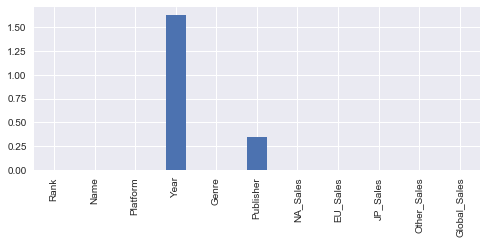

In [78]:
(data.isnull().sum()/len(data) *100).plot.bar(figsize=(8, 3))

As the Nan Percentages are very very low (below 2%), it's safe to say that we can just remove the NaN samples.

In [79]:
data.dropna(inplace=True)
data.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [80]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [82]:
cat_features = [f for f in data.columns if data[f].dtype=='O'] # ['Name', 'Platform', 'Genre', 'Publisher']

for f in cat_features:
    print(f'Number of Unique Labels in [{f}] : {len(data[f].unique())}')

Number of Unique Labels in [Name] : 11325
Number of Unique Labels in [Platform] : 31
Number of Unique Labels in [Genre] : 12
Number of Unique Labels in [Publisher] : 576


In [108]:
median = data.groupby('Genre')[tar].median().sort_values()
mean   = data.groupby('Genre')[tar].mean().sort_values()

median

Genre
Adventure       0.060
Strategy        0.090
Puzzle          0.105
Misc            0.160
Simulation      0.160
Action          0.190
Racing          0.190
Role-Playing    0.190
Fighting        0.210
Sports          0.220
Shooter         0.230
Platform        0.280
Name: Global_Sales, dtype: float64

In [111]:
data[tar].describe()

count    16291.000000
mean         0.540910
std          1.567345
min          0.010000
25%          0.060000
50%          0.170000
75%          0.480000
max         82.740000
Name: Global_Sales, dtype: float64

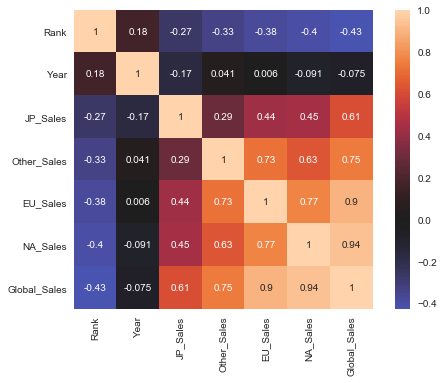

In [37]:
corr_map = data.corr().sort_values('Global_Sales', axis=0).sort_values('Global_Sales', axis=1)
sns.heatmap(corr_map, annot=True, square=True, center=0)

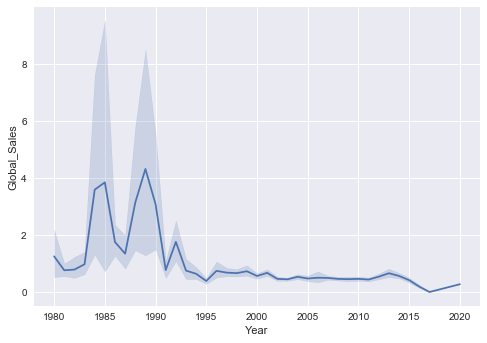

In [44]:
sns.lineplot(data.Year, data.Global_Sales)

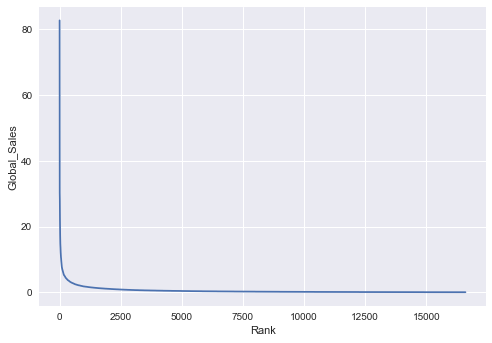

In [49]:
sns.lineplot(data.Rank, data.Global_Sales)